In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import tf_explain
from tf_explain.core.grad_cam import GradCAM

In [2]:
# import model vit_minst
model = tf.keras.models.load_model('./cnn_cifar10')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)         

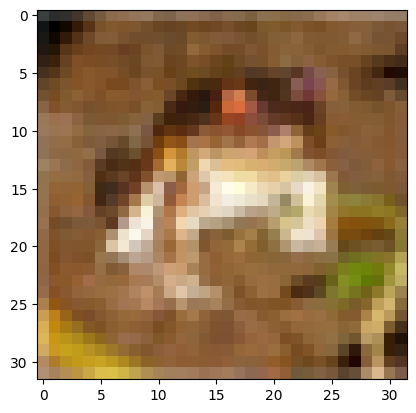

In [3]:
train, test = keras.datasets.cifar10.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

x_test, y_test = test

x_test = x_test / 255.0

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

y_test = y_test.astype("float32")


import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32, 3)

plt.imshow(sample)

In [4]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 2ms/step - loss: 1.1553 - accuracy: 0.6061


[1.1552568674087524, 0.6061000227928162]

C:\Users\Maciej\AppData\Local\Temp\ipykernel_640\979282033.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sample_y = int(y_train[i])


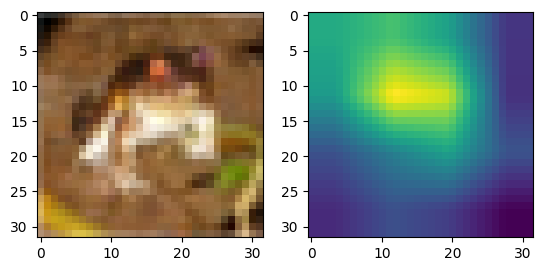

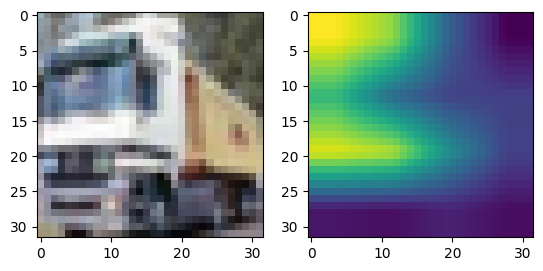

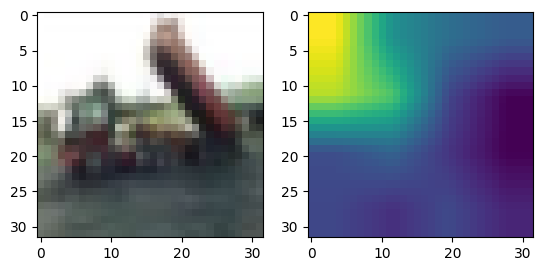

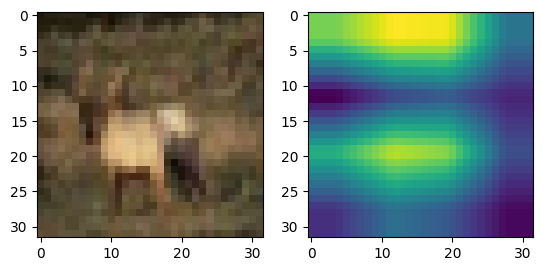

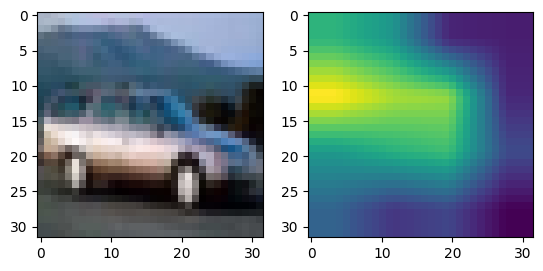

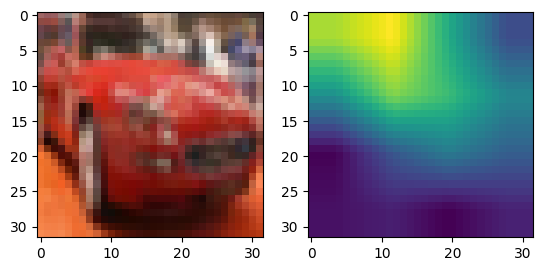

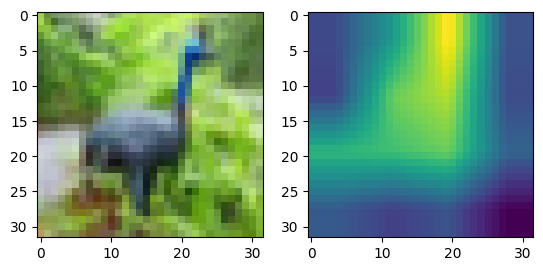

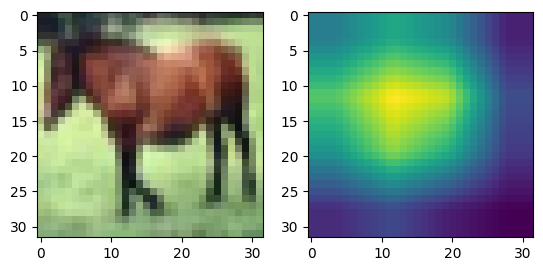

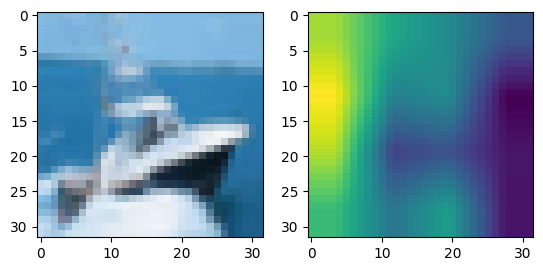

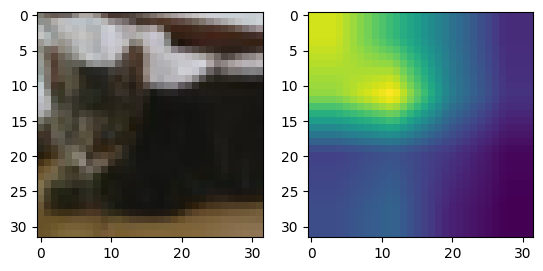

In [16]:
# include both sample and 
for i in range(10):
    sample = x_train[i].reshape(32, 32, 3)
    sample_y = int(y_train[i])
    sample = np.expand_dims(sample, axis=0)
    explainer = GradCAM()
    grid = explainer.explain((sample, sample_y), model, class_index=sample_y, image_weight=0)

    # plot both
    plt.subplot(1, 2, 1)
    plt.imshow(sample[0])
    plt.subplot(1, 2, 2)
    plt.imshow(grid)
    plt.show()
